<a target="_blank" href="https://colab.research.google.com/github/giordamaug/WisardLib4Python/blob/main/test_digits.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Installation

In [ ]:
!git clone https://github.com/giordamaug/WisardLib4Python.git
%cd WisardLib4Python
!pip install pybind11
!python setup.py build_ext --inplace 

## Training

In [1]:
from PIL import Image
import numpy as np
import zipfile
import wisard
d = wisard.WiSARD(32*32, n_bits=8, map=0, classes = [0,1,2,3,4,5,6,7,8,9])
archive = zipfile.ZipFile('data/dataset.zip', 'r')
for i in d.getClasses(): 
    for n in range(999):
        try:
            img = Image.open(archive.open(f'dataset/train/{i}/{i}-{n+1:03d}.png'))
            image = np.asarray(img).flatten()
            image = np.where(image < 128, 1, 0) 
            d.train(image, i)        
        except:
            break

## Testing

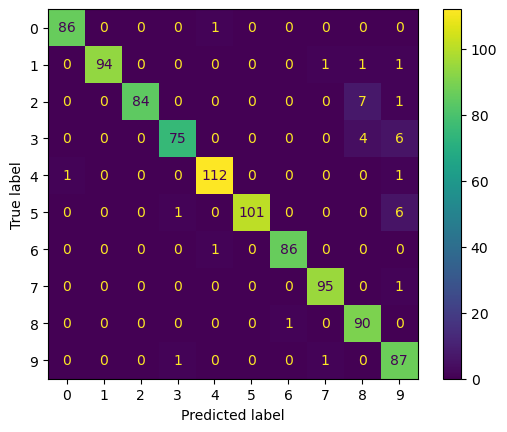

In [2]:
archive = zipfile.ZipFile('data/dataset.zip', 'r')
preds = []
targets = []
classes = d.getClasses()
for i in classes: 
    for n in range(999):
        try:
            img = Image.open(archive.open(f'dataset/test/{i}/{i}-{n+1:03d}.png'))
            image = np.asarray(img).flatten()
            image = np.where(image < 128, 1, 0) 
            prediction = d.test(image)
            #prediction = d.test_bleaching(image)
            r = d.response(image)
            preds += [prediction] 
            targets += [i]  
        except:
            break
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(targets, preds)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()

## Show Mental Images

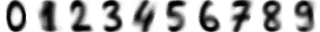

In [3]:
mi = []
for i in d.getClasses():
    mig = d.getMI(i).reshape((32,32))
    mig = (1- (mig - mig.min()) / (mig.max() - mig.min()))*255
    mi += [Image.fromarray(np.uint8(mig))]
new_im = Image.new('L', (32*len(d.getClasses()), 32))
x_offset = 0
for im in mi:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]
new_im
